# Experience 1

### Importation des librairies

In [1]:
import os
import cartopy.crs as ccrs
import sys
import glob
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import seaborn as sns

### Téléchargement des données

In [38]:
#Repertoire ou le fichier se trouve
path_file='C:/Users/useem/OneDrive - UQAM/08- Automne 2025/SCA5460 - Laboratoire 3/Experience 1/imerg_pr_201911_3h.nc4'

# Nom de la variable
var_name='precipitationCal'

# Pour lire le fichier
print('Reading file: ',path_file)
ds_i = xr.open_dataset(path_file)
ds_i.close()
print('Reading file: DONE')
precipitation = ds_i[var_name]
lons = ds_i['lon']
lats = ds_i['lat']

Reading file:  C:/Users/useem/OneDrive - UQAM/08- Automne 2025/SCA5460 - Laboratoire 3/Experience 1/imerg_pr_201911_3h.nc4
Reading file: DONE


### Série temporelle pour kuala Lumpur

Text(0.5, 0, 'Date')

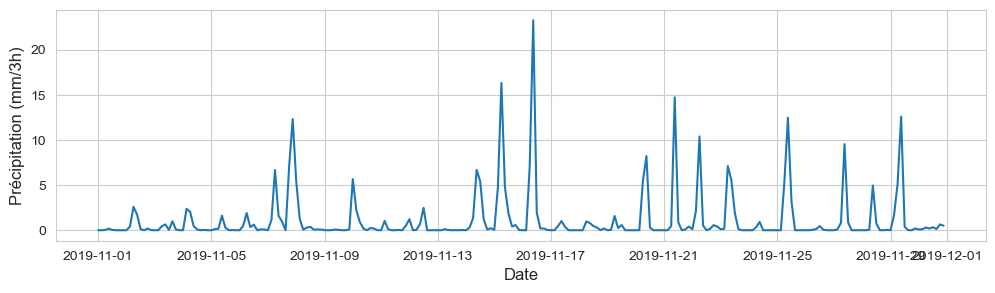

In [39]:
data_all_args = ds_i['precipitationCal'].sel(lat=3.1, lon=101.6, method='nearest')
temps = ds_i['time']
fig,ax = plt.subplots(figsize=(12,3))
ax.plot(temps,data_all_args)
ax.set_ylabel("Précipitation (mm/3h)",size=12)
ax.set_xlabel("Date",size=12)

### Série temporelle pour Montréal